In [3]:
import os
import cv2
import time
import glob
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from collections import Counter
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Importing all the needed modules.
!pip install -U tensorflow-addons
import os

import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, classification_report
from tensorflow import keras
#import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import MaxPooling2D,AveragePooling2D, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.inception_v3 import InceptionV3
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
%matplotlib inline

from random import randint

     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [5]:
# plot confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
!tar -xf /content/drive/MyDrive/OCT2017.tar.gz

# Load Data

In [7]:
#Parameters

image_size = 224
batch_size = 32
num_classes = 4

 Preprocessing : Scale & Split dataset

In [8]:
train_datagen = ImageDataGenerator(validation_split=0.2,rescale = 1./255) # set validation split

train_generator = train_datagen.flow_from_directory('/content/OCT2017/train',target_size=(image_size, image_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory('/content/OCT2017/train',target_size=(image_size,image_size),
                                                         batch_size=batch_size,
                                                         class_mode='categorical',
                                                         subset='validation') # set as validation data


test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory("/content/OCT2017/test",target_size=(image_size, image_size),
                                                  batch_size=1000,
                                                  class_mode='categorical')

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


## Load Models

In [15]:
#load models
CNN = tf.keras.models.load_model('/content/drive/MyDrive/CNN.hdf5')
InceptionNet = tf.keras.models.load_model('/content/drive/MyDrive/InceptionNet2.hdf5')
MobileNetV2 = tf.keras.models.load_model('/content/drive/MyDrive/MobileNetV2.hdf5')
VGG16= tf.keras.models.load_model('/content/drive/MyDrive/Vgg16.hdf5')
#EfficientNet = tf.keras.models.load_model('/content/drive/MyDrive/retina_oct_effcientNet.hdf5')

In [9]:
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 256)     7168      
                                                                 
 batch_normalization_12 (Bat  (None, 222, 222, 256)    1024      
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 256)    0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 111, 111, 256)     0         
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 256)     590080    
                                                                 
 batch_normalization_13 (Bat  (None, 109, 109, 256)   

In [10]:
InceptionNet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [11]:
MobileNetV2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 64)          737344    
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               160100    
                                                                 
 dense_3 (Dense)             (None, 4)                 404       
                                                                 
Total params: 3,155,832
Trainable params: 897,848
Non-trainable params: 2,257,984
______________________________________

In [16]:
VGG16.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

## Create Attack :  
#### The Fast Gradient Sign Method (FGSM) 

In [17]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(model,input_image, input_label):
  input_image = tf.cast(input_image, tf.float32)
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

In [18]:
X_test,y_test = next(test_generator)
print(X_test.shape)
print(y_test.shape)

(1000, 224, 224, 3)
(1000, 4)


## Exemple : 
### Appliquer l'attaque FGSM sur une seule image en utilisant le model CNN.
Create Perturbations

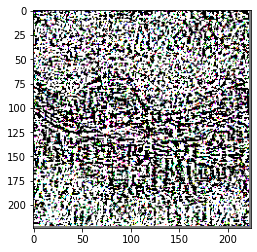

In [17]:
# Get the input label of the image.
# Créer un bruit avec l'image X_test[10]

label = tf.reshape(y_test[10], (1, 4))
image = X_test[10].reshape((1, 224, 224, 3))

perturbations = create_adversarial_pattern(CNN,image,label)
plt.imshow(perturbations[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]

Appliquer l'attaque

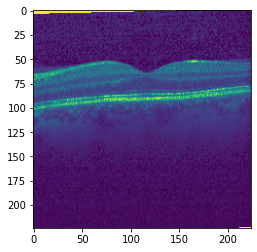

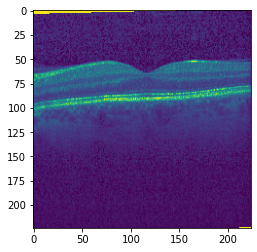

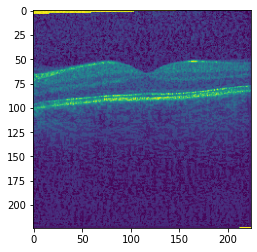

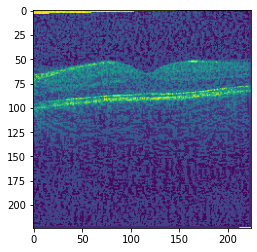

In [18]:
def display_images(image):
  
  pr = MobileNetV2.predict(image)
  #label = listofClasses[np.argmax(pr)]
  plt.figure()
  plt.imshow(image[0][:,:,0])
  #plt.title('{}'.format(label))
  plt.show()

epsilons = [0,0.01,0.05,0.1]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]
# Appliquer l'attaque sur l'image X_test[0]
for i, eps in enumerate(epsilons):
  adv_x = X_test[100].reshape((1, 224, 224, 3)) + eps*perturbations
  adv_x = tf.clip_by_value(adv_x, -1, 1)
  display_images(adv_x)

### Create a function for applying the fgsm attack on set of data

In [19]:
def adversary_generator(model,batch_size):

  N = randint(0, 900)
  label = tf.reshape(y_test[N], (1, 4))
  image = X_test[N].reshape((1,224, 224, 3))
  perturbations = create_adversarial_pattern(model ,image, label)

  while True:
    images = []
    labels = []

    for batch in range(batch_size):

      img = X_test[batch].reshape((1, 224, 224, 3))
      #adv_label = tf.reshape(y_test[batch], (1, 4))
      adv_label = y_test[batch]

      
      adversarial = img + (perturbations * 0.1)

      images.append(adversarial)
      labels.append(adv_label)

      if batch%100 == 0:
        print(f"{batch} images generated")

    images = np.asarray(images).reshape((batch_size, 224, 224, 3))
    labels = np.asarray(labels)

    yield images, labels

### Applying Attack on full Test Data / Defense

1 - CNN

In [25]:
x_adv, y_adv = next(adversary_generator(CNN,1000))

0 images generated
100 images generated
200 images generated
300 images generated
400 images generated
500 images generated
600 images generated
700 images generated
800 images generated
900 images generated


In [41]:
ad_acc = CNN.evaluate(x_adv, y_adv, verbose=0)
print(f"Accuracy on Adversarial Examples: {ad_acc[1]*100}")

Accuracy on Adversarial Examples: 37.5


--------------------
| Confusion Matrix |
--------------------

 [[250   0   0   0]
 [228  19   0   3]
 [242   0   8   0]
 [137  15   0  98]]


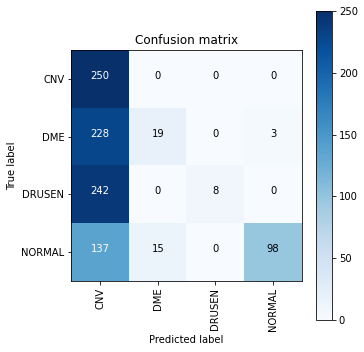

In [42]:
y_pred = CNN.predict_generator(x_adv,steps = 50)
y_true = np.argmax(y_adv, axis=-1)
Y_pred = np.argmax(y_pred, axis=-1)

# confusion matrix
import itertools
cm = confusion_matrix(y_true, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(5,5))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

### Defense CNN

In [43]:
#Split attacked data

from sklearn.model_selection import train_test_split

x_adv_train, x_adv_test, y_adv_train, y_adv_test = train_test_split(
    x_adv, y_adv, test_size=0.4)


In [44]:
X_train = np.concatenate((X_test,x_adv_train), axis=0)
y_train = np.concatenate((y_test, y_adv_train), axis=0)

In [45]:
history = CNN.fit(X_train, y_train,validation_split=0.1, epochs =10, verbose=1, batch_size=32)

Epoch 1/10
45/45 [==============================] - 19s 407ms/step - loss: 0.3131 - accuracy: 0.8944 - val_loss: 0.7513 - val_accuracy: 0.7063
Epoch 2/10
45/45 [==============================] - 18s 399ms/step - loss: 0.1301 - accuracy: 0.9639 - val_loss: 0.5698 - val_accuracy: 0.7625
Epoch 3/10
45/45 [==============================] - 18s 401ms/step - loss: 0.1238 - accuracy: 0.9660 - val_loss: 0.2057 - val_accuracy: 0.9187
Epoch 4/10
45/45 [==============================] - 18s 404ms/step - loss: 0.0839 - accuracy: 0.9799 - val_loss: 0.0979 - val_accuracy: 0.9875
Epoch 5/10
45/45 [==============================] - 18s 409ms/step - loss: 0.0811 - accuracy: 0.9792 - val_loss: 0.2975 - val_accuracy: 0.8813
Epoch 6/10
45/45 [==============================] - 18s 408ms/step - loss: 0.0794 - accuracy: 0.9778 - val_loss: 0.1154 - val_accuracy: 0.9750
Epoch 7/10
45/45 [==============================] - 18s 406ms/step - loss: 0.0616 - accuracy: 0.9847 - val_loss: 0.2767 - val_accuracy: 0.9062

In [37]:
ad_acc = CNN.evaluate(x_adv_test, y_adv_test, verbose=0)
print(f"Accuracy after applying defense: {ad_acc[1]*100}")

Accuracy after applying defense: 95.99999785423279


In [38]:
pred = CNN.predict(x_adv_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_adv_test,axis=1)

--------------------
| Confusion Matrix |
--------------------

 [[103   1   0   0]
 [  3  85   0  11]
 [  0   0  95   1]
 [  0   0   0 101]]


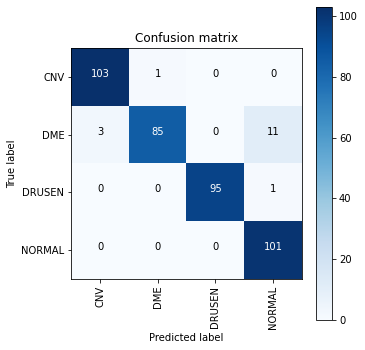

In [46]:
# confusion matrix
import itertools
cm = confusion_matrix(y_test_new, pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(5,5))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

### 2- InceptionNet

In [47]:
x_adv, y_adv = next(adversary_generator(InceptionNet,1000))

0 images generated
100 images generated
200 images generated
300 images generated
400 images generated
500 images generated
600 images generated
700 images generated
800 images generated
900 images generated


In [48]:
ad_acc = InceptionNet.evaluate(x_adv, y_adv, verbose=0)
print(f"Accuracy on Adversarial Examples: {ad_acc[1]*100}")

Accuracy on Adversarial Examples: 25.600001215934753


--------------------
| Confusion Matrix |
--------------------

 [[  6   0   0 244]
 [  3   0   0 247]
 [  7   0   0 243]
 [  0   0   0 250]]


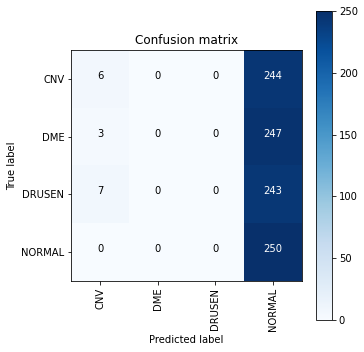

In [50]:
y_pred = InceptionNet.predict_generator(x_adv,steps = 50)
y_true = np.argmax(y_adv, axis=-1)
Y_pred = np.argmax(y_pred, axis=-1)

# confusion matrix
import itertools
cm = confusion_matrix(y_true, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(5,5))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

### Defense InceptionNet

In [51]:
#Split attacked data

from sklearn.model_selection import train_test_split

x_adv_train, x_adv_test, y_adv_train, y_adv_test = train_test_split(
    x_adv, y_adv, test_size=0.4)

X_train = np.concatenate((X_test,x_adv_train), axis=0)
y_train = np.concatenate((y_test, y_adv_train), axis=0)

history = InceptionNet.fit(X_train, y_train,validation_split=0.1, epochs =10, verbose=1, batch_size=32)

Epoch 1/10
45/45 [==============================] - 17s 266ms/step - loss: 0.0811 - accuracy: 0.9736 - val_loss: 0.7710 - val_accuracy: 0.7063
Epoch 2/10
45/45 [==============================] - 11s 239ms/step - loss: 0.0091 - accuracy: 0.9979 - val_loss: 0.0417 - val_accuracy: 0.9812
Epoch 3/10
45/45 [==============================] - 11s 240ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.0281 - val_accuracy: 0.9875
Epoch 4/10
45/45 [==============================] - 11s 242ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.0147 - val_accuracy: 0.9875
Epoch 5/10
45/45 [==============================] - 11s 243ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 6.7883e-04 - val_accuracy: 1.0000
Epoch 6/10
45/45 [==============================] - 11s 244ms/step - loss: 7.8033e-04 - accuracy: 1.0000 - val_loss: 3.4267e-04 - val_accuracy: 1.0000
Epoch 7/10
45/45 [==============================] - 11s 246ms/step - loss: 4.7433e-04 - accuracy: 1.0000 - val_loss: 2.1589e-04 - 

In [52]:
ad_acc = InceptionNet.evaluate(x_adv_test, y_adv_test, verbose=0)
print(f"Accuracy after applying defense: {ad_acc[1]*100}")

Accuracy after applying defense: 99.75000023841858


--------------------
| Confusion Matrix |
--------------------

 [[ 83   0   0   0]
 [  0 113   0   0]
 [  0   0  96   0]
 [  0   0   1 107]]


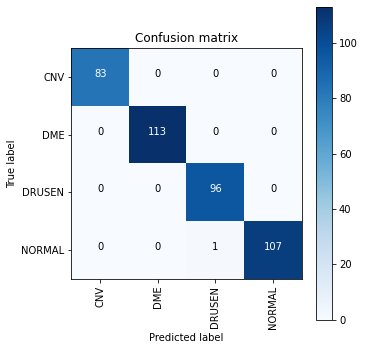

In [53]:
pred = InceptionNet.predict(x_adv_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_adv_test,axis=1)

# confusion matrix
import itertools
cm = confusion_matrix(y_test_new, pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(5,5))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

### 3- MobileNetV2

In [54]:
x_adv, y_adv = next(adversary_generator(MobileNetV2,1000))

0 images generated
100 images generated
200 images generated
300 images generated
400 images generated
500 images generated
600 images generated
700 images generated
800 images generated
900 images generated


Accuracy on Adversarial Examples: 53.39999794960022
--------------------
| Confusion Matrix |
--------------------

 [[201  48   0   1]
 [ 58 172   1  19]
 [212  32   1   5]
 [ 22  63   5 160]]


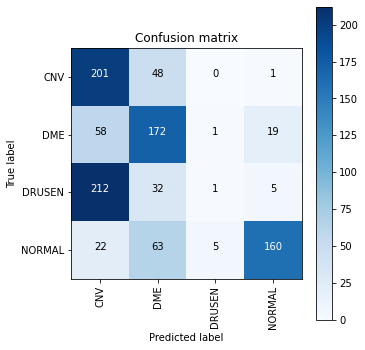

In [55]:
ad_acc = MobileNetV2.evaluate(x_adv, y_adv, verbose=0)
print(f"Accuracy on Adversarial Examples: {ad_acc[1]*100}")


y_pred = MobileNetV2.predict_generator(x_adv,steps = 50)
y_true = np.argmax(y_adv, axis=-1)
Y_pred = np.argmax(y_pred, axis=-1)

# confusion matrix
import itertools
cm = confusion_matrix(y_true, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(5,5))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

Defense MobileNetV2

In [56]:
#Split attacked data

from sklearn.model_selection import train_test_split

x_adv_train, x_adv_test, y_adv_train, y_adv_test = train_test_split(
    x_adv, y_adv, test_size=0.4)

X_train = np.concatenate((X_test,x_adv_train), axis=0)
y_train = np.concatenate((y_test, y_adv_train), axis=0)

history = MobileNetV2.fit(X_train, y_train,validation_split=0.1, epochs =10, verbose=1, batch_size=32)

Epoch 1/10
45/45 [==============================] - 5s 73ms/step - loss: 0.3564 - accuracy: 0.8542 - auc_1: 0.9774 - f1_score: 0.8534 - val_loss: 0.6568 - val_accuracy: 0.7500 - val_auc_1: 0.9340 - val_f1_score: 0.7332
Epoch 2/10
45/45 [==============================] - 2s 51ms/step - loss: 0.1728 - accuracy: 0.9299 - auc_1: 0.9945 - f1_score: 0.9295 - val_loss: 0.5990 - val_accuracy: 0.8000 - val_auc_1: 0.9422 - val_f1_score: 0.7964
Epoch 3/10
45/45 [==============================] - 2s 53ms/step - loss: 0.0955 - accuracy: 0.9632 - auc_1: 0.9983 - f1_score: 0.9631 - val_loss: 0.7611 - val_accuracy: 0.8062 - val_auc_1: 0.9313 - val_f1_score: 0.8086
Epoch 4/10
45/45 [==============================] - 2s 51ms/step - loss: 0.0501 - accuracy: 0.9854 - auc_1: 0.9997 - f1_score: 0.9854 - val_loss: 0.7862 - val_accuracy: 0.8250 - val_auc_1: 0.9326 - val_f1_score: 0.8193
Epoch 5/10
45/45 [==============================] - 2s 53ms/step - loss: 0.0295 - accuracy: 0.9896 - auc_1: 0.9999 - f1_scor

In [57]:
ad_acc = MobileNetV2.evaluate(x_adv_test, y_adv_test, verbose=0)
print(f"Accuracy after applying defense: {ad_acc[1]*100}")

Accuracy after applying defense: 87.99999952316284


--------------------
| Confusion Matrix |
--------------------

 [[82  4  3  0]
 [ 6 79  3 10]
 [ 8  5 99  3]
 [ 0  3  3 92]]


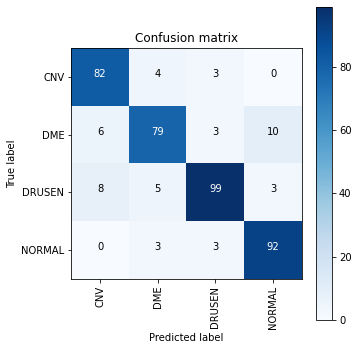

In [58]:
pred = MobileNetV2.predict(x_adv_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_adv_test,axis=1)

# confusion matrix
import itertools
cm = confusion_matrix(y_test_new, pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(5,5))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

### 4- VGG16

In [20]:
x_adv, y_adv = next(adversary_generator(VGG16,1000))

0 images generated
100 images generated
200 images generated
300 images generated
400 images generated
500 images generated
600 images generated
700 images generated
800 images generated
900 images generated


In [22]:
ad_acc = VGG16.evaluate(x_adv, y_adv, verbose=0)
print(f"Accuracy on Adversarial Examples: {ad_acc[1]*100}")

Accuracy on Adversarial Examples: 47.29999899864197


--------------------
| Confusion Matrix |
--------------------

 [[207   0   0  43]
 [ 51  17   0 182]
 [140   0   0 110]
 [  1   0   0 249]]


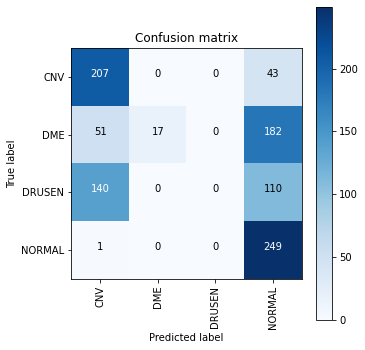

In [23]:
y_pred = VGG16.predict_generator(x_adv,steps = 50)
y_true = np.argmax(y_adv, axis=-1)
Y_pred = np.argmax(y_pred, axis=-1)

# confusion matrix
import itertools
cm = confusion_matrix(y_true, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(5,5))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

Defense VGG16

In [24]:
#Split attacked data

from sklearn.model_selection import train_test_split

x_adv_train, x_adv_test, y_adv_train, y_adv_test = train_test_split(
    x_adv, y_adv, test_size=0.4)

X_train = np.concatenate((X_test,x_adv_train), axis=0)
y_train = np.concatenate((y_test, y_adv_train), axis=0)

history = VGG16.fit(X_train, y_train,validation_split=0.1, epochs =10, verbose=1, batch_size=32)

Epoch 1/10
45/45 [==============================] - 13s 286ms/step - loss: 0.7027 - accuracy: 0.7875 - val_loss: 0.9907 - val_accuracy: 0.6062
Epoch 2/10
45/45 [==============================] - 12s 278ms/step - loss: 0.2424 - accuracy: 0.9076 - val_loss: 0.4717 - val_accuracy: 0.8250
Epoch 3/10
45/45 [==============================] - 13s 279ms/step - loss: 0.1670 - accuracy: 0.9354 - val_loss: 0.4013 - val_accuracy: 0.8687
Epoch 4/10
45/45 [==============================] - 12s 276ms/step - loss: 0.1160 - accuracy: 0.9604 - val_loss: 0.4511 - val_accuracy: 0.8375
Epoch 5/10
45/45 [==============================] - 12s 277ms/step - loss: 0.0859 - accuracy: 0.9736 - val_loss: 0.3712 - val_accuracy: 0.8625
Epoch 6/10
45/45 [==============================] - 12s 274ms/step - loss: 0.0706 - accuracy: 0.9833 - val_loss: 0.4233 - val_accuracy: 0.8438
Epoch 7/10
45/45 [==============================] - 12s 277ms/step - loss: 0.0761 - accuracy: 0.9778 - val_loss: 0.3892 - val_accuracy: 0.8438

In [25]:
ad_acc = VGG16.evaluate(x_adv_test, y_adv_test, verbose=0)
print(f"Accuracy after applying defense: {ad_acc[1]*100}")

Accuracy after applying defense: 85.50000190734863


--------------------
| Confusion Matrix |
--------------------

 [[ 79   7   6   0]
 [  7  81   8   6]
 [ 10   5  79   3]
 [  0   4   2 103]]


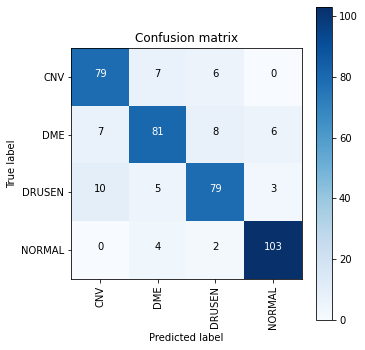

In [26]:
pred = VGG16.predict(x_adv_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_adv_test,axis=1)

# confusion matrix
import itertools
cm = confusion_matrix(y_test_new, pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(5,5))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

## Merci!!!